In [13]:
import os
from numba import njit,jit
import numpy as np
from tqdm.notebook import tqdm as tqdmn # progress bar
import jax.numpy as jnp

import seaborn as sns
sns.set(color_codes=True)
sns.set_palette(sns.color_palette("Paired")+['#D3D3D3','#808080'])

import matplotlib.pyplot as plt
from matplotlib import font_manager as fm, rcParams
import matplotlib.colors
import matplotlib as mpl
mpl.rcParams['axes.linewidth'] = 0.2 #set the value globally
mpl.rcParams['xtick.major.width'] = 0.3
mpl.rcParams['xtick.minor.width'] = 0.3
mpl.rcParams['ytick.major.width'] = 0.3
mpl.rcParams['ytick.minor.width'] = 0.3

from netCDF4 import Dataset
import scipy.stats as sp
import adsfunc as ads

fpath = os.path.join(rcParams["datapath"], "/Users/felixlangot/Library/Fonts/Cronos-Pro-Light_12448.ttf")
Csprop = fm.FontProperties(fname=fpath)
Cstitleprop = Csprop.copy()
Cslabelprop = Csprop.copy()
Cstitleprop.set_size(30)
Csprop.set_size(25)
Cslabelprop.set_size(25)

fpath2 = os.path.join(rcParams["datapath"], "/Users/felixlangot/Library/Fonts/MinionPro-Regular.otf")
Mpprop = fm.FontProperties(fname=fpath2)
Mptitleprop = Mpprop.copy()
Mplabelprop = Mpprop.copy()
Mptitleprop.set_size(30)
Mpprop.set_size(25)
Mplabelprop.set_size(15)

fpath3 = os.path.join(rcParams["datapath"], "/Users/felixlangot/Library/Fonts/texgyrepagella-math.otf")
Tgprop = fm.FontProperties(fname=fpath3)
Tgtitleprop = Tgprop.copy()
Tglabelprop = Tgprop.copy()
Tgtitleprop.set_size(30)
Tgprop.set_size(25)
Tglabelprop.set_size(15)

# Means

In [14]:
%store -r meanRHplist_cumu
%store -r meanRHplist_cyc
%store -r meanRHplist_sqll
%store -r meanRHplist_cumudt10

In [15]:
steplist = [1,3,6,12,24,48,96,144]
steplist2 = [1,2,4,8,16,32,48]
labelsRHcomp = ['Cumulonimubus dt=10min', 'Cumulonimbus', 'Cyclone', 'Squall line']
interval = np.linspace(0, 1, 10)
colorlist = [mpl.cm.rainbow(i) for i in interval]

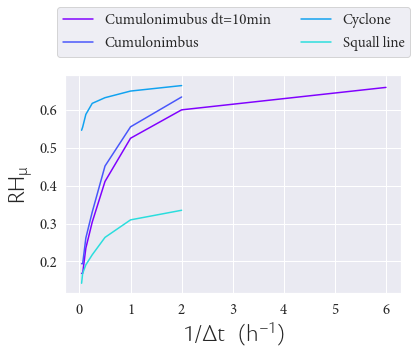

In [16]:
meanRHcomp = [meanRHplist_cumudt10, meanRHplist_cumu, meanRHplist_cyc, meanRHplist_sqll]
plt.plot(1/(np.asarray(steplist)*1/6), meanRHplist_cumudt10, color=colorlist[0], label=labelsRHcomp[0])
for i in np.arange(1,len(meanRHcomp)):
    plt.plot(1/(np.asarray(steplist2)*1/2), meanRHcomp[i], color=colorlist[i], label = labelsRHcomp[i])
plt.xlabel('$\mathdefault{1/\Delta t~~(h^{-1})}$ ', fontproperties=Cslabelprop)
plt.ylabel(r'$\mathdefault{RH_{\mu}}$', fontproperties=Cslabelprop)
#plt.xlim(25,0)
plt.xticks(font = Mplabelprop)
plt.yticks(font = Mplabelprop)
plt.legend(bbox_to_anchor=(1.05, 1.35), ncol=2, prop=Mplabelprop)
plt.savefig('Figs/meanRHscomp.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

In [17]:
%store -r Rhnlist
meanRhlist = []
for i in np.arange(len(Rhnlist)):
    meanRhlist.append(np.mean(Rhnlist[i]))
meanRHlist = [meanRHplist_cumudt10[0], meanRHplist_cyc[0], meanRHplist_sqll[0]]

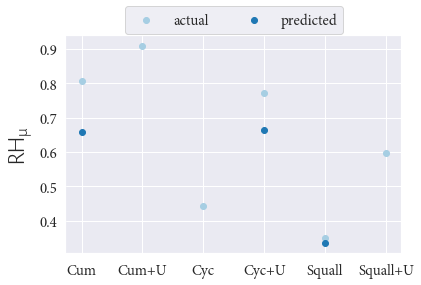

In [18]:
absc = [1,2,3,4,5,6]
absc2 = [1,4,5]
labels = ['Cum', 'Cum+U', 'Cyc', 'Cyc+U', 'Squall', 'Squall+U']
plt.scatter(absc, meanRhlist, label='actual')
plt.scatter(absc2, meanRHlist, label='predicted')
plt.xticks(absc, labels, font=Mplabelprop)
plt.yticks(font = Mplabelprop)
plt.legend(bbox_to_anchor=(0.85, 1.17), ncol=2, prop=Mplabelprop)
plt.ylabel(r'$\mathdefault{RH_{\mu}}$', fontproperties=Cslabelprop)
plt.savefig('Figs/RHmuactualpred.png', bbox_inches='tight', format='PNG', dpi=600)
plt.show()

# $\sigma$

In [19]:
steplist = [1,2,4,8,16,32,48]
nsamples = 9

In [20]:
RHpCumuDt10 = np.loadtxt('RHarrays/RHp_dt10_1.txt')
RHpSqll = np.loadtxt('RHarrays/RHp')

OSError: RHarrays/RHp not found.

In [ ]:
for step in steplist:
    locals()['RHplCumuDt10'+str(step)] = np.zeros((10, 128*128))
    locals()['RHplCumuDt10'+str(step)][0] = np.loadtxt('RHarrays/RHp_dt10_'+str(step)+'.txt').flatten()
    for i in np.arange(2,nsamples+1):
        locals()['RHp'+str(step)+'_'+str(i)] = np.loadtxt('RHarrays/RHp_dt10_'+str(step)+'_'+str(i)+'.txt')
        locals()['RHplist'+str(step)][i-1] = locals()['RHp'+str(step)+'_'+str(i)].flatten()
    locals()['RHplist'+str(step)] = locals()['RHplist'+str(step)].flatten()